In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy

In [3]:
# Read the CSV file
df = pd.read_csv('r2022p.csv')

/var/folders/db/_xq7w7js1z19930glv4c6fg80000gn/T/ipykernel_62010/3993568550.py:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('r2022p.csv')


In [4]:
# Get a statistical summary of the data
print(df.describe())

           Inscrits    Abstentions  Abstentions_ins       Votants  \
count  3.503500e+04   35035.000000     35035.000000  3.503500e+04   
mean   1.350420e+03     339.452776        20.633678  1.010967e+03   
std    9.303293e+03    2318.542207         6.289849  7.063957e+03   
min    4.000000e+00       0.000000         0.000000  3.000000e+00   
25%    1.630000e+02      31.000000        17.037037  1.310000e+02   
50%    3.590000e+02      70.000000        20.111732  2.880000e+02   
75%    8.970000e+02     184.000000        23.398944  7.085000e+02   
max    1.368025e+06  296656.000000        96.619782  1.071369e+06   

        Votants_ins        Blancs    Blancs_ins    Blancs_vot          Nuls  \
count  35035.000000  35035.000000  35035.000000  35035.000000  35035.000000   
mean      79.366322     15.378479      1.299283      1.638508      6.758384   
std        6.289849     81.068367      0.953137      1.195441     33.169930   
min        3.380218      0.000000      0.000000      0.000000 

In [7]:
# Count the number of unique values in each categorical column
print(df.select_dtypes(include='object').nunique())

CodeInsee          35035
CodeDepartement      108
Commune            32784
dtype: int64


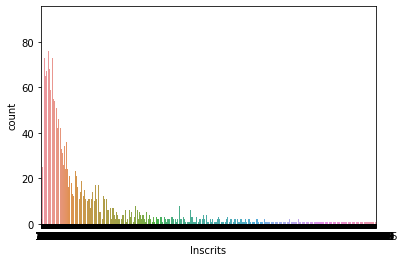

In [8]:
# Visualize the count of unique values in each categorical column
sns.countplot(x=df.columns[3], data=df)
plt.show()

In [4]:
# Sort the data by the "Inscrits" column in descending order
df = df.sort_values(by='Inscrits', ascending=False)

# Get the 1000 largest elements of the "Inscrits" column
top_1000_grandes_villes = df['Commune'].head(1000).tolist()

# Print the list
#print(top_1000_grandes_villes)


In [9]:
# Create a geolocator object
geolocator = geopy.geocoders.Nominatim(user_agent="urban-density-voting-patterns")

#Initiate a list of all the coordinates
commune_coord = []

# Iterate over the list of locations
for commune in list(df['Commune']):
    # Look up the coordinates of the location
    location_coordinates = geolocator.geocode(commune)
    # append the coordinates
    commune_coord.append(f"{location_coordinates.latitude}, {location_coordinates.longitude}")

GeocoderTimedOut: Service timed out

In [56]:
testdf = df.tail(100)

testdf['comm_dep'] = df.apply(lambda row: f"{row['Commune']}, {row['CodeDepartement']}000", axis=1)


from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
testdf['coord'] = testdf['comm_dep'].apply(geocode)

testdf['point'] = testdf['coord'].apply(lambda loc: tuple(loc.point) if loc else None)

/var/folders/db/_xq7w7js1z19930glv4c6fg80000gn/T/ipykernel_62010/2460052320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['comm_dep'] = df.apply(lambda row: f"{row['Commune']}, {row['CodeDepartement']}000", axis=1)
/var/folders/db/_xq7w7js1z19930glv4c6fg80000gn/T/ipykernel_62010/2460052320.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['coord'] = testdf['comm_dep'].apply(geocode)
/var/folders/db/_xq7w7js1z19930glv4c6fg80000gn/T/ipykernel_62010/2460052320.py:10: SettingWithCopyWarnin

In [57]:
testdf

,CodeInsee,CodeDepartement,Commune,Inscrits,Abstentions,Abstentions_ins,Votants,Votants_ins,Blancs,Blancs_ins,...,ZEMMOUR.exp,MÉLENCHON.exp,HIDALGO.exp,JADOT.exp,PÉCRESSE.exp,POUTOU.exp,DUPONT-AIGNAN.exp,comm_dep,coord,point
25955,66086,66,Glorianes,23,5,21.739130,18,78.260870,1,4.347826,...,23.529412,47.058824,0.000000,0.000000,0.000000,0.0,0.00000,"Glorianes, 66000","(Glorianes, Prades, Pyrénées-Orientales, Occit...","(42.590251800000004, 2.5540751883593718, 0.0)"
33975,89207,89,Jouancy,23,1,4.347826,22,95.652174,1,4.347826,...,19.047619,14.285714,0.000000,9.523810,4.761905,0.0,0.00000,"Jouancy, 89000",None,None
3968,11402,11,Valmigère,23,2,8.695652,21,91.304348,2,8.695652,...,5.263158,42.105263,10.526316,0.000000,0.000000,0.0,0.00000,"Valmigère, 11000","(Valmigère, Limoux, Aude, Occitanie, France mé...","(42.9824218, 2.3759149, 0.0)"
17951,50374,50,Neuville-en-Beaumont,23,7,30.434783,16,69.565217,0,0.000000,...,6.250000,18.750000,0.000000,0.000000,6.250000,0.0,0.00000,"Neuville-en-Beaumont, 50000","(Neuville-en-Beaumont, Cherbourg, Manche, Norm...","(49.3477862, -1.5999868, 0.0)"
25500,65102,65,Bouilh-Devant,23,2,8.695652,21,91.304348,0,0.000000,...,0.000000,0.000000,4.761905,4.761905,9.523810,0.0,9.52381,"Bouilh-Devant, 65000","(Bouilh-Devant, Tarbes, Hautes-Pyrénées, Occit...","(43.3316027, 0.2601455, 0.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7234,21303,21,Les Goulles,9,0,0.000000,9,100.000000,0,0.000000,...,0.000000,11.111111,0.000000,0.000000,22.222222,0.0,0.00000,"Les Goulles, 21000","(Les Goulles, Montbard, Côte-d'Or, Bourgogne-F...","(47.8816892, 4.9064441, 0.0)"
9572,26274,26,Rochefourchat,8,1,12.500000,7,87.500000,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.285714,0.0,0.00000,"Rochefourchat, 26000","(Rochefourchat, Die, Drôme, Auvergne-Rhône-Alp...","(44.5983241, 5.2468373, 0.0)"
18576,51470,51,Rouvroy-Ripont,8,1,12.500000,7,87.500000,0,0.000000,...,0.000000,14.285714,0.000000,0.000000,0.000000,0.0,0.00000,"Rouvroy-Ripont, 51000","(Rouvroy-Ripont, Châlons-en-Champagne, Marne, ...","(49.22149075, 4.709640893296548, 0.0)"
11380,31127,31,Caubous,7,2,28.571429,5,71.428571,0,0.000000,...,0.000000,60.000000,20.000000,0.000000,20.000000,0.0,0.00000,"Caubous, 31000","(Caubous, Saint-Gaudens, Haute-Garonne, Occita...","(42.8511392, 0.5227772, 0.0)"


In [61]:
point_2 = []

for i in list(testdf['point']):
    try:
        point_2.append(i[0:2])
    except:
        pass

In [62]:
import folium

# Define a list of locations
locations = point_2

# Create a map centered at the mean coordinates of the locations
mean_coordinates = [sum(x) / len(x) for x in zip(*locations)]
map = folium.Map(location=mean_coordinates, zoom_start=12)

# Add a marker for each location
for location in locations:
    folium.Marker(location=location).add_to(map)

# Display the map
map